# H2O example

This notebook will give an example of how to use `skutil` preprocessors with H2OEstimators and H2OFrames.

In [2]:
from __future__ import print_function, division
import skutil
import sklearn
import h2o
import pandas as pd
import numpy as np

# we'll be plotting inline...
%matplotlib inline

print('Skutil version:  %s' % skutil.__version__)
print('H2O version:     %s' % h2o.__version__)
print('Numpy version:   %s' % np.__version__)
print('Sklearn version: %s' % sklearn.__version__)
print('Pandas version:  %s' % pd.__version__)

Skutil version:  0.0.42
H2O version:     3.8.3.3
Numpy version:   1.11.0
Sklearn version: 0.18.dev0
Pandas version:  0.18.0


### Initialize H2O

First, we'll start our H2O cluster...

In [3]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    # I started this cluster up via CLI with:
    #     $ java -Xmx2g -jar h2o.jar
    h2o.init(ip='10.110.106.131', port=54323)

H2O cluster uptime:,14 minutes 8 seconds 818 milliseconds
H2O cluster version:,3.8.3.3
H2O cluster name:,fp7y
H2O cluster total nodes:,1
H2O cluster total free memory:,1.53 GB
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster healthy:,True
H2O Connection ip:,10.110.106.131
H2O Connection port:,54323
H2O Connection proxy:,None


### Load data

We'll load sklearn's breast cancer data. Using skutil's `from_pandas` method, we can upload a Pandas frame to the H2O cloud

In [4]:
from sklearn.datasets import load_breast_cancer
from skutil.h2o.util import from_pandas

# import data, load into pandas
bc = load_breast_cancer()
X = pd.DataFrame.from_records(data=bc.data, columns=bc.feature_names)
X['target'] = bc.target

# push to h2o cloud
X = from_pandas(X)
X.head()


Parse Progress: [##################################################] 100%


mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0
20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,0
19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,0
20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,0
12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,0
18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,0
13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072,0
12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.221,0.4366,0.2075,0


In [5]:
# Here are our feature names:
x = list(bc.feature_names)
y = 'target'

## train/test split

Sklearn provides a great mechanism for splitting data into a train and validation set. Skutil provides the same mechanism for h2o frames.

In [6]:
from skutil.h2o import h2o_train_test_split

# first, let's make sure our target is a factor
X[y] = X[y].asfactor()

# we'll use 75% of the data for training...
X_train, X_test = h2o_train_test_split(X, train_size=0.75, random_state=42)

### `skutil.h2o` preprocessing

Skutil provides an `h2o` module which delivers some skutil `feature_selection` classes that can operate on an H2OFrame. Each `BaseH2OTransformer` has the following `__init__` signature:

    BaseH2OTransformer(self, feature_names=None, target_feature=None)
    
The selector will only operate on the `feature_names` (if provided) and will always exclude the `target_feature`.

In [7]:
from skutil.h2o import H2ONearZeroVarianceFilterer

# Let's determine whether we're at risk for any near-zero variance
nzv = H2ONearZeroVarianceFilterer(feature_names=x, target_feature=y, threshold=1e-4)
nzv.fit(X_train)

# let's see if anything was dropped...
nzv.drop_

['mean fractal dimension',
 'smoothness error',
 'concave points error',
 'symmetry error',
 'fractal dimension error']

### Multicollinearity

Multicollinearity (MC) can be detrimental to parametric models (for our example, we're going to use GBM, which is non-parametric, but the demo is still useful). With skutil, we can filter out features that are correlated beyond a certain absolute threshold.  When a violating correlation is identified, the feature with the highest mean absolute correlation is removed.

Before filtering out collinear features, let's take a look at the correlation matrix:

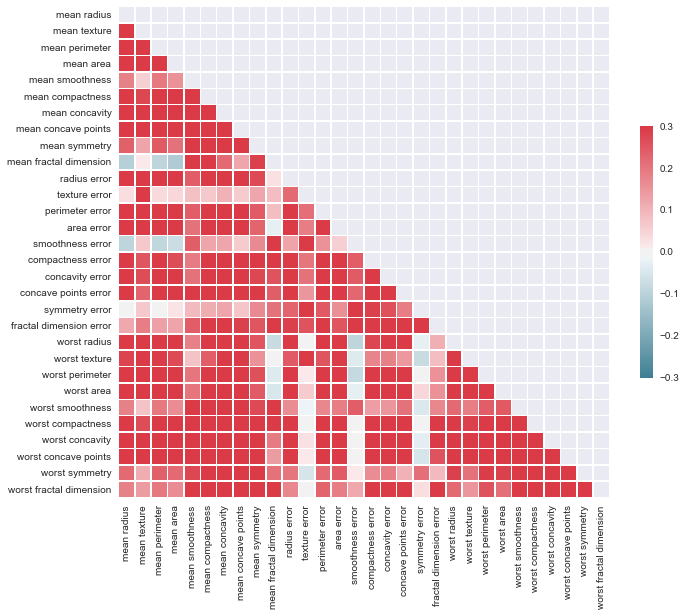

In [8]:
from skutil.h2o import h2o_corr_plot

# note that we want to exclude the target!!
h2o_corr_plot(X_train[x], xticklabels=x, yticklabels=x)

In [9]:
from skutil.h2o import H2OMulticollinearityFilterer

# Are we at risk of any multicollinearity?
mcf = H2OMulticollinearityFilterer(feature_names=x, target_feature=y, threshold=0.85)
mcf.fit(X_train)

# we can look at the dropped features
mcf.correlations_

[Dropped: mean perimeter, Corr_feature: mean radius, abs_corr: 0.98824, MAC: 0.44609,
 Dropped: mean radius, Corr_feature: mean area, abs_corr: 0.93647, MAC: 0.41866,
 Dropped: worst radius, Corr_feature: mean area, abs_corr: 0.87059, MAC: 0.41551,
 Dropped: worst perimeter, Corr_feature: mean area, abs_corr: 0.86118, MAC: 0.41611,
 Dropped: worst area, Corr_feature: mean area, abs_corr: 0.85176, MAC: 0.38551,
 Dropped: perimeter error, Corr_feature: radius error, abs_corr: 0.86118, MAC: 0.39706]

### `skutil.h2o` modeling

Skutil's `h2o` module allows us to form the familiar `Pipeline` objects we're familiar with from sklearn.

In [10]:
from skutil.h2o import H2OPipeline
from h2o.estimators import H2OGradientBoostingEstimator
from sklearn.metrics import accuracy_score

# let's fit a pipeline with our estimator...
pipe = H2OPipeline([
        ('nzv', H2ONearZeroVarianceFilterer(threshold=1e-4)),
        ('mcf', H2OMulticollinearityFilterer(threshold=0.85)),
        ('gbm', H2OGradientBoostingEstimator(ntrees=100, max_depth=5))
    ], feature_names=x, target_feature=y)

# fit...
pipe = pipe.fit(X_train)

# eval accuracy on validation set
pred = pipe.predict(X_test)
actual = X_test[y].as_data_frame(use_pandas=True)[y].values
pred = pred['predict'].as_data_frame(use_pandas=True).predict.values
print('Validation accuracy: %.5f' % accuracy_score(actual, pred))


gbm Model Build Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%
Validation accuracy: 0.90210


### Hyperparameter optimization

With relatively little effort, we got 90% accuracy on our validation set! Can we improve that? We can use `sklearn`-esque grid searches, which also allow us to search over preprocessor objects to optimize a set of hyperparameters.

In [11]:
from skutil.h2o import H2ORandomizedSearchCV
from skutil.h2o import H2OKFold
from scipy.stats import uniform, randint

# define our random state
rand_state = 42

# let's redefine our pipeline
pipe = H2OPipeline([
        ('nzv', H2ONearZeroVarianceFilterer()),
        ('mcf', H2OMulticollinearityFilterer()),
        ('gbm', H2OGradientBoostingEstimator(seed=rand_state))
    ])

# our hyperparameters over which to search...
hyper = {
    'nzv__threshold'    : uniform(1e-6,1e-2),
    'mcf__threshold'    : uniform(0.7, 0.29),
    'gbm__ntrees'       : randint(50, 100),
    'gbm__max_depth'    : randint(3, 10),
    'gbm__min_rows'     : randint(5, 50),
    'gbm__learn_rate'   : uniform(0.025, 0.075)
}

# define our grid search
search = H2ORandomizedSearchCV(
        estimator=pipe,
        param_grid=hyper,
        feature_names=x,
        target_feature=y,
        n_iter=5, # keep it small for our demo...
        random_state=rand_state,
        scoring='accuracy_score',
        cv=H2OKFold(n_folds=3, shuffle=True, random_state=rand_state),
        verbose=3
    )

# fit
search.fit(X_train)

[CV (iter 0, fold 0)] Target: target; gbm__min_rows=19, gbm__ntrees=92, mcf__threshold=0.926110390079, nzv__threshold=0.00596950157946, gbm__max_depth=7, gbm__learn_rate=0.0530905089136 

gbm Model Build Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%

[CV (iter 0, fold 0)]  Target: target; gbm__min_rows=19, gbm__ntrees=92, mcf__threshold=0.926110390079, nzv__threshold=0.00596950157946, gbm__max_depth=7, gbm__learn_rate=0.0530905089136, score=0.922535 -   4.6s


[CV (iter 0, fold 1)] Target: target; gbm__min_rows=19, gbm__ntrees=92, mcf__threshold=0.926110390079, nzv__threshold=0.00596950157946, gbm__max_depth=7, gbm__learn_rate=0.0530905089136 

gbm Model Build Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%

[CV (iter 0, fold 1)]  Target: target; gbm__min_rows=19, gbm__ntrees=92,

H2ORandomizedSearchCV(cv=H2OKFold(n_folds=3, random_state=42, shuffle=True),
           estimator=H2OPipeline(feature_names=None,
      steps=[('nzv', H2ONearZeroVarianceFilterer(feature_names=None, na_rm=False, na_warn=True,
              target_feature=None, threshold=1e-06, use='complete.obs')), ('mcf', H2OMulticollinearityFilterer(feature_names=None, na_rm=False, na_warn=True,
               target_feature=None, threshold=0.85, use='complete.obs')), ('gbm', )],
      target_feature=None),
           feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness e...ompactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'],
           iid=True, n_iter=5, n_jobs=1,
           param_grid={'mcf__threshold': <sci

### Model evaluation

Beyond merely observing our validation set score, we can dig into the cross validation scores of each model in our H2O grid search, and select the model that has not only the best mean score, but the model that minimizes variability in the CV scores.

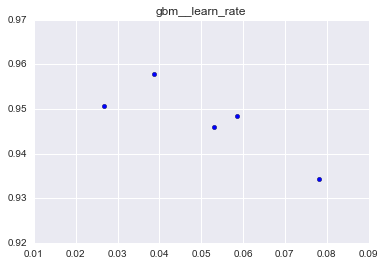

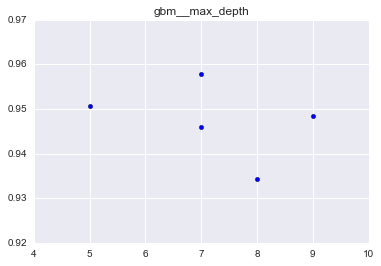

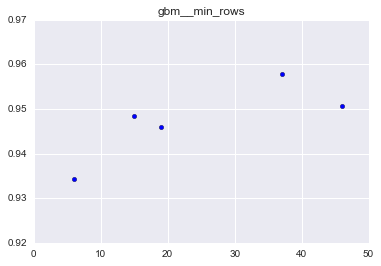

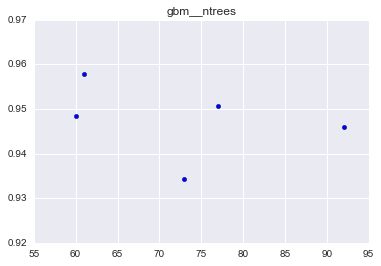

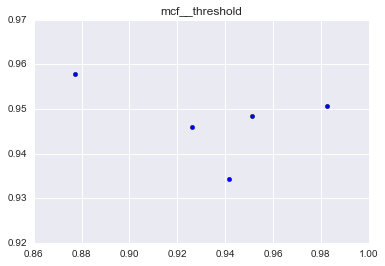

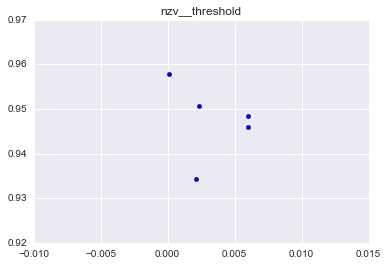

,gbm__learn_rate,gbm__max_depth,gbm__min_rows,gbm__ntrees,mcf__threshold,nzv__threshold,score,std
3,0.038637,7,37,61,0.877379,0.000072,0.957746,0.019520
4,0.026730,5,46,77,0.982389,0.002329,0.950704,0.029817
1,0.058437,9,15,60,0.951191,0.006012,0.948357,0.023460
0,0.053091,7,19,92,0.926110,0.005970,0.946009,0.039579
2,0.078105,8,6,73,0.941408,0.002124,0.934272,0.026027


In [13]:
from skutil.utils import report_grid_score_detail

# now let's look deeper...
report_grid_score_detail(search, charts=True, sort_results=True, ascending=False)

So our best estimator achieves a mean cross validation accuracy of 95%! We can predict on our best estimator as follows:

In [15]:
preds = search.predict(X_test)

# print accuracy
print('Validation accuracy: %.5f' 
      % accuracy_score(actual, preds['predict'].as_data_frame(use_pandas=True).predict.values))

# look at head
preds.head()


gbm prediction Progress: [##################################################] 100%
Validation accuracy: 0.95804


predict,p0,p1
0,0.875882,0.124118
0,0.925874,0.0741262
0,0.949961,0.0500393
0,0.849558,0.150442
0,0.713244,0.286756
0,0.928229,0.0717708
0,0.943345,0.0566546
0,0.936526,0.0634738
0,0.875843,0.124157
0,0.801515,0.198485


## Model persistence

When we find a model that performs well, we can save it to disk for later use:

In [17]:
import os

# get absolute path
cwd = os.getcwd()
model_path = os.path.join(cwd, 'grid.pkl')

# save -- it's that easy!!!
search.save(location=model_path)

### Loading and making predictions

In [18]:
the_model = H2ORandomizedSearchCV.load(model_path)
new_predictions = the_model.predict(X_test)
new_predictions.head()


gbm prediction Progress: [##################################################] 100%


predict,p0,p1
0,0.875882,0.124118
0,0.925874,0.0741262
0,0.949961,0.0500393
0,0.849558,0.150442
0,0.713244,0.286756
0,0.928229,0.0717708
0,0.943345,0.0566546
0,0.936526,0.0634738
0,0.875843,0.124157
0,0.801515,0.198485


#### Cleanup

Always make sure to shut down your cluster...

In [19]:
h2o.shutdown(prompt=False) # shutdown cluster
os.unlink(model_path) # remove the pickle file...